In [1]:
import pandas as pd

In [11]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [12]:
data_df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [13]:
len(data_df)

70000

In [14]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
None


In [16]:
for column in data_df.columns:
    unique_values = data_df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'date': ['03-05-2021' '05-08-2021' '13-11-2022' ... '23-01-2020' '09-02-2018'
 '07-11-2021']
Unique values for column 'country': ['Indonesia' 'Malaysia' 'Singapore' 'India']
Unique values for column 'id': [    0     1     2 ... 99996 99998 99999]
Unique values for column 'active': [1 0]
Unique values for column 'age': [18393 20228 18857 ... 14925 17727 17926]
Unique values for column 'alco': [0 1]
Unique values for column 'ap_hi': [  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   122   169   126   158   200    14   123    70
   161   147   115   137   153    11   148   105   220   119   141   165
   164    12   124   172   902   162   906   117   134   166   210   176
   116    10   121    16   112   159   113   118   155   142   131   157
   136   146   138  -100   909   109    85   106   129    93     7    95
   179   156   168   132   104   103   178   175   128   151    15   139
 11500   127    17   108   14

In [17]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

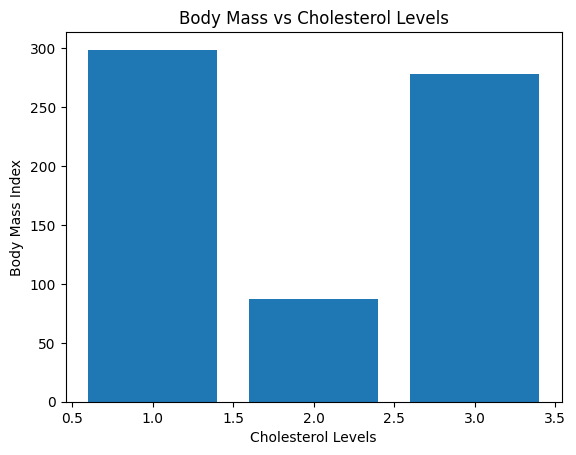

In [24]:
import matplotlib.pyplot as plt

cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

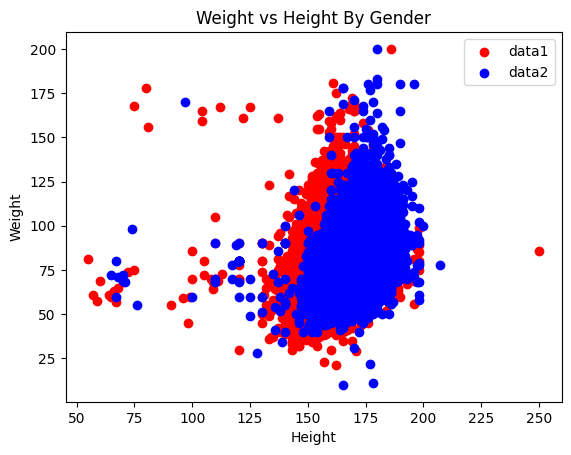

In [26]:
dataset1 = data_df[data_df['gender'] == 1]
dataset2 = data_df[data_df['gender'] == 2]

#Plotting
plt.scatter(dataset1['height'], dataset1['weight'], color='red', label='data1')
plt.scatter(dataset2['height'], dataset2['weight'], color='blue', label='data2')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height By Gender')

plt.legend()
plt.show()

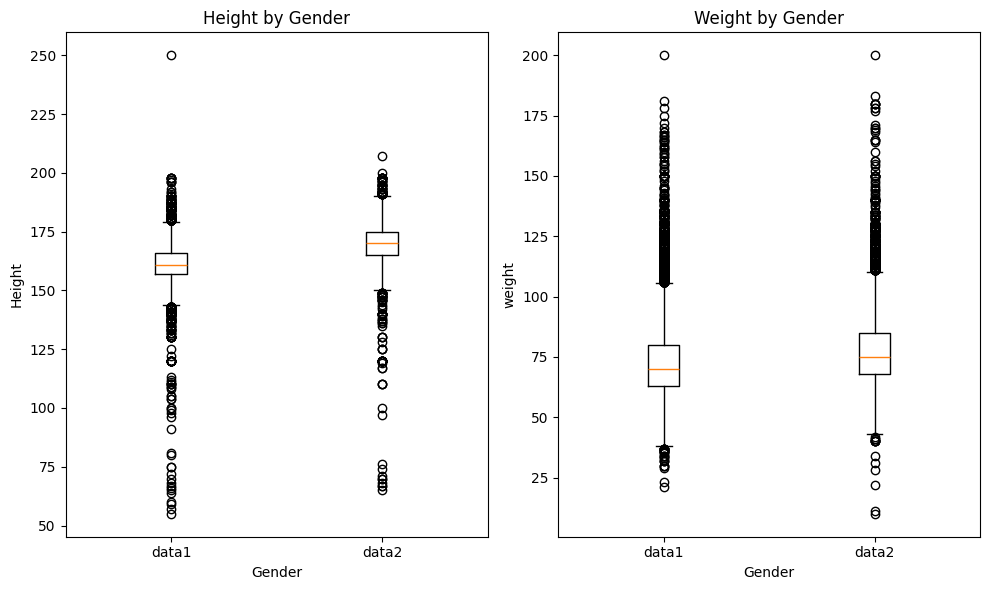

In [28]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [18]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

#data_df.drop(columns=['cholesterol'], inplace=True)



In [19]:
data_df

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age_years,bmi,cholesterol_high,cholesterol_medium,cholesterol_low
0,03-05-2021,Indonesia,0,1,0,110,80,1,2,1,168,Architect,0,62.0,0,50,21.967120,0,0,1
1,05-08-2021,Malaysia,1,1,0,140,90,3,1,1,156,Accountant,0,85.0,1,55,34.927679,1,0,0
2,13-11-2022,Indonesia,2,0,0,130,70,3,1,1,165,Chef,0,64.0,1,51,23.507805,1,0,0
3,31-10-2018,Singapore,3,1,0,150,100,1,2,1,169,Lawyer,0,82.0,1,48,28.710479,0,0,1
4,25-09-2020,Singapore,4,0,0,100,60,1,1,1,156,Architect,0,56.0,0,47,23.011177,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,03-04-2018,Singapore,99993,1,0,120,80,1,2,1,168,Doctor,1,76.0,0,52,26.927438,0,0,1
69996,12-01-2022,Malaysia,99995,1,0,140,90,2,1,2,158,Accountant,0,126.0,1,61,50.472681,0,1,0
69997,25-08-2022,Malaysia,99996,0,1,180,90,3,2,1,183,Accountant,0,105.0,1,52,31.353579,1,0,0
69998,13-07-2020,Singapore,99998,0,0,135,80,1,1,2,163,Accountant,0,72.0,1,61,27.099251,0,0,1


In [23]:
data_df.max()

date                  31-12-2022
country                Singapore
id                         99999
active                         1
alco                           1
ap_hi                      16020
ap_lo                      11000
cholesterol                    3
gender                         2
gluc                           3
height                       250
occupation               Teacher
smoke                          1
weight                     200.0
disease                        1
age_years                     64
bmi                   298.666667
cholesterol_high               1
cholesterol_medium             1
cholesterol_low                1
dtype: object

In [25]:
data_df[data_df['bmi'] > 200]

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age_years,bmi,cholesterol_high,cholesterol_medium,cholesterol_low
12770,28-02-2021,Malaysia,18218,1,0,120,80,1,1,1,75,Nurse,1,168.0,1,53,298.666667,0,0,1
22723,22-11-2021,India,32456,1,0,130,90,1,1,1,55,Teacher,0,81.0,1,64,267.768595,0,0,1
23913,20-08-2018,Singapore,34186,1,0,140,90,1,1,1,81,Nurse,0,156.0,0,52,237.768633,0,0,1
27384,19-10-2018,India,39156,1,0,140,90,3,1,3,80,Architect,0,178.0,1,41,278.125000,1,0,0
